In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Задание 1

In [68]:
# Load the dataframe:
df_house = pd.read_csv("kc-house-data.csv", sep=",")
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


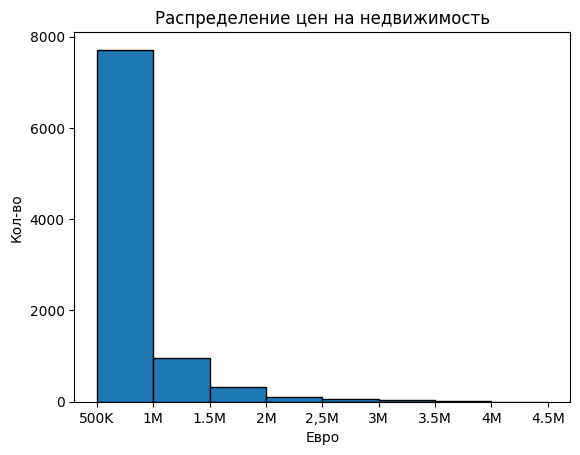

In [70]:
# Make a plot for price:
ticks = [500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000]
labels = ['500K', '1M', '1.5M', '2M', '2,5M', '3M', '3.5M', '4M', '4.5M']

plt.hist(df_house['price'], bins = ticks, edgecolor="black")
plt.title('Распределение цен на недвижимость')
plt.xlabel('Евро')
plt.ylabel('Кол-во')

plt.xticks(ticks, labels)
plt.yticks(np.arange(0, 8001, 2000))

plt.show()

Больше всего домов в ценовом диапазоне от 500 тысяч до 1 миллиона евро - около 7800-8000 домов. Резкое падение до 1000 домов в диапазоне от 1 миллиона до 1.5 миллиона евро и дальнейшее стремительное уменьшение количества с увеличением цены. <br>
Самые дорогие дома в диапазоне от 4 миллионов до 4.5 миллионов евро, но их крайне мало.

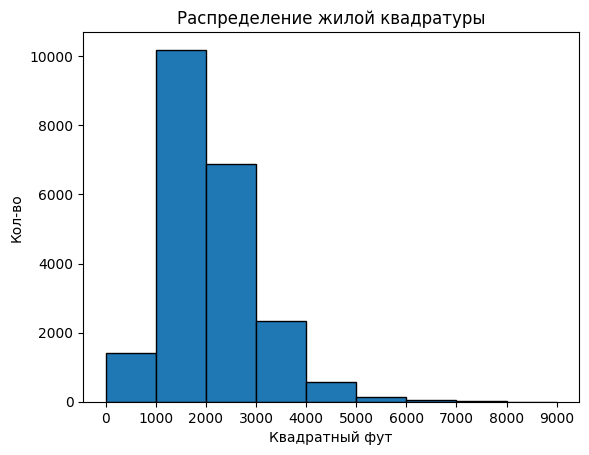

In [71]:
# Make a plot for living square footage:
bins = np.arange(0, 10000, 1000)
plt.hist(df_house['sqft_living'], bins=bins, edgecolor="black")
plt.title('Распределение жилой квадратуры')
plt.xlabel('Квадратный фут')
plt.ylabel('Кол-во')

plt.xticks(bins)

plt.show()

Наибольшее количество домов квадратурой между 1000 и 2000 квадратных футов - около 10 000 домов. Домов в диапазоне 2000-3000 кв. футов на четверть меньше этого. Около 2000 домов входят в диапазон 3000-4000 кв. футов.

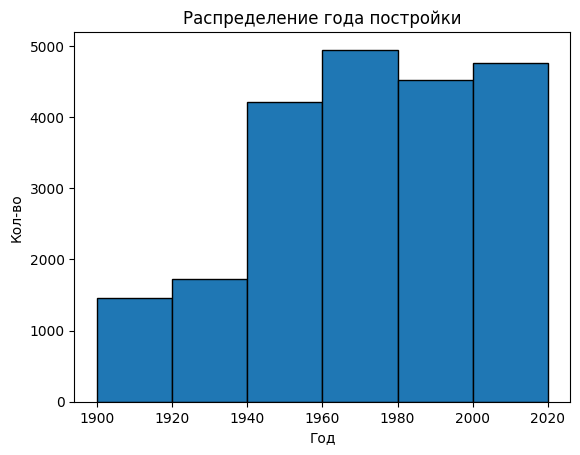

In [72]:
# Make a plot for year built:
bins = np.arange(1900, 2031, 20)
plt.hist(df_house['yr_built'], bins=bins, edgecolor="black")
plt.title('Распределение года постройки')
plt.xlabel('Год')
plt.ylabel('Кол-во')

plt.xticks(bins)

plt.show()

Больше всего домов построено в период после 1940 года, в частности в период с 1960 по 1980 год.

### Задание 2

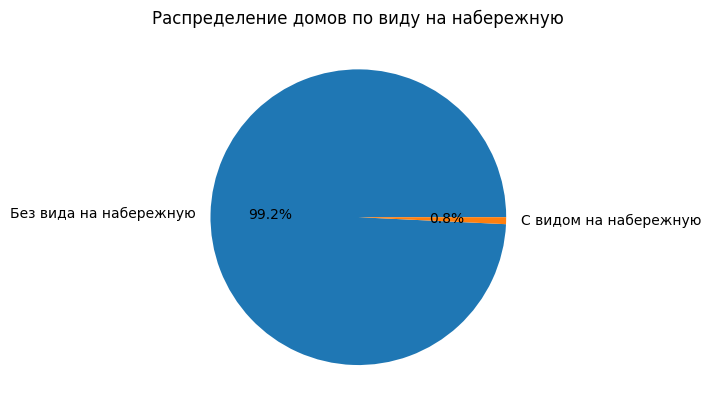

In [80]:
# Make a plot for waterfront or not:
data = df_house['waterfront'].value_counts()

names = data.index
values = data.values

custom_labels = ['Без вида на набережную', 'С видом на набережную']

plt.pie(values, labels=custom_labels, autopct="%.1f%%")
plt.title('Распределение домов по виду на набережную')

plt.show()

Как можно заметить, подавляющее большинство домов не имеют вида на набережную.

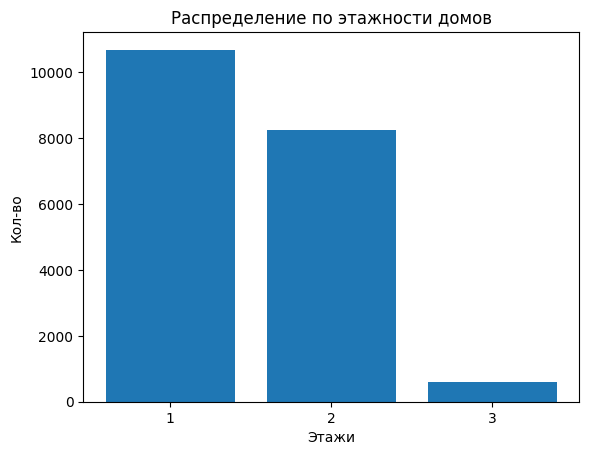

In [99]:
data = df_house["floors"].value_counts()

names = data.index.astype(int)
values = data.values

plt.bar(names, values)
plt.title("Распределение по этажности домов")
plt.xlabel("Этажи")
plt.ylabel("Кол-во")

plt.xticks(range(min(names), max(names) + 1))

plt.show()

Большинство домов одно- и двух-этажные - около 10 000 и 8000 домов соответственно. Домов в 3 этажа меньше 1000 штук.

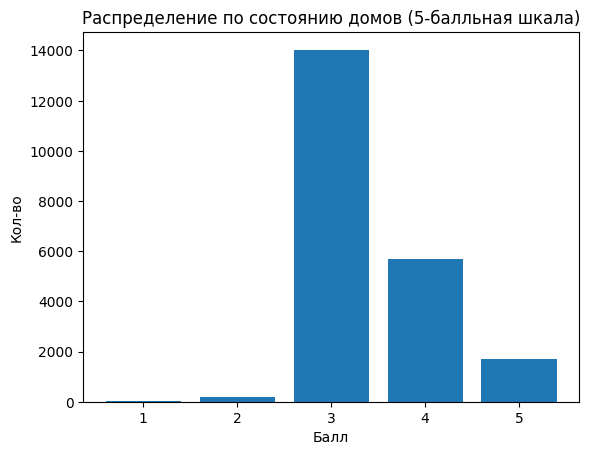

In [104]:
data = df_house["condition"].value_counts()

names = data.index
values = data.values

plt.bar(names, values)
plt.title("Распределение по состоянию домов (5-балльная шкала)")
plt.xlabel("Балл")
plt.ylabel("Кол-во")

plt.xticks(range(min(names), max(names) + 1))

plt.show()

Как видно из графика, больше всего домов среднего состояния - их около 14 000. Чуть меньше половины этого количества можно оценить на 4/5, а 5/5 всего 2000. Однако это все еще больше домов в плохом состоянии (1-2 балла), которых гораздо меньше 1000 штук.

### Задание 3

Сначала попробуем по отдельности разные переменные.

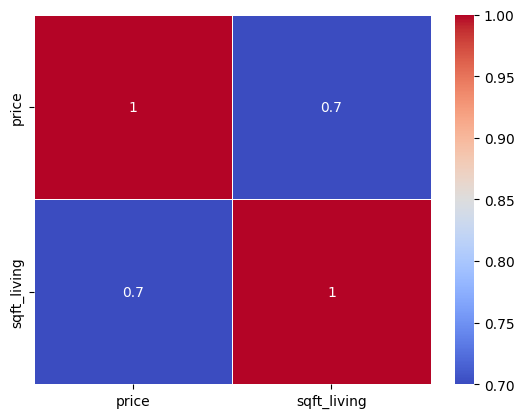

In [116]:
corr_matrix = df_house[["price", "sqft_living"]].corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap="coolwarm");

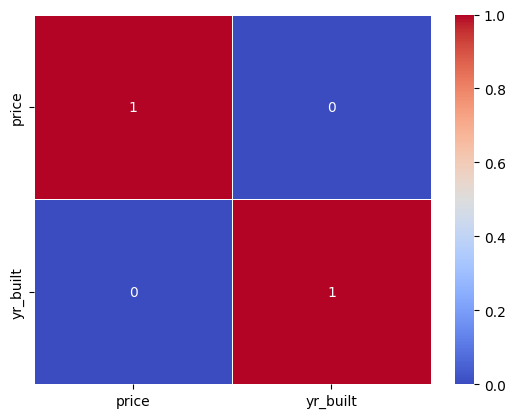

In [117]:
corr_matrix = df_house[["price", "yr_built"]].corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap="coolwarm");

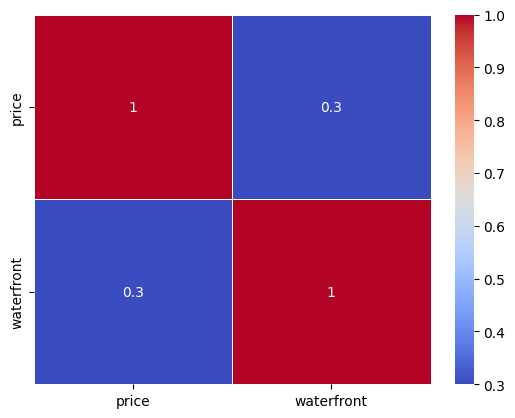

In [118]:
corr_matrix = df_house[["price", "waterfront"]].corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap="coolwarm");

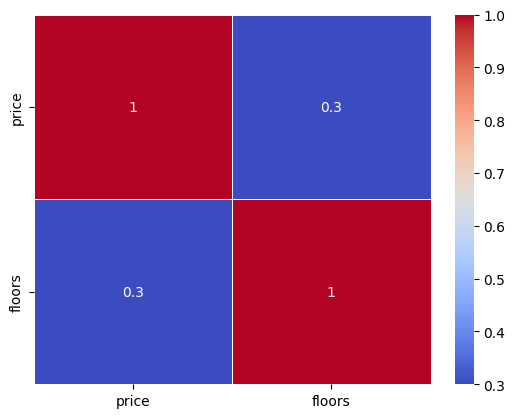

In [119]:
corr_matrix = df_house[["price", "floors"]].corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap="coolwarm");

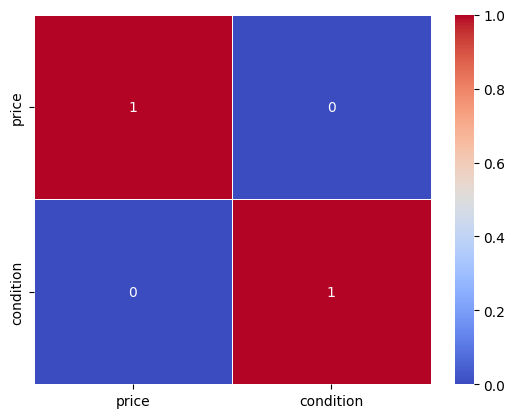

In [120]:
corr_matrix = df_house[["price", "condition"]].corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap="coolwarm");

Судя по тепловым картам, самая большая корреляция у цены существует с жилой квадратурой, а также в меньшей степени с видимостью набережной и этажностью дома, в то время как состояние дома и год постройки с ценой не имеют связи. <br>
Учитывая малое количество домов в ужасном состоянии (из задания 2) и преобладание домов в состоянии на 3-5/5, малое влияние состояния на цену в принципе понятно. Что касается года строительства, то если дом в приемлемом состоянии, год постройки обычно не так важен. <br>
Остальные три показатели, как близость к водоему (видимость набережной), этажность дома и квадратура определенно имеют влияние на цену, из-за чего их показатель корреляции выше. <br>
<strong>Вывод</strong>: эти три показателя больше всего оказывают влияние на цену дома.